

  <b>Number of Attributes :</b><br>
   <b>height</b>:   integer.         | Height of the block.<br>
   <b>length</b>:   integer.     | Length of the block. <br>
   <b>area</b>:     integer.    | Area of the block (height * length);<br>
   <b>eccen</b>:    continuous.  | Eccentricity of the block (length / height);<br>
   <b>p_black</b>:  continuous.  | Percentage of black pixels within the block (blackpix / area);<br>
   <b>p_and</b>:    continuous.        | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);<br>
   <b>mean_tr</b>:  continuous.      | Mean number of white-black transitions (blackpix / wb_trans);<br>
   <b>blackpix</b>: integer.    | Total number of black pixels in the original bitmap of the block.<br>
   <b>blackand</b>: integer.        | Total number of black pixels in the bitmap of the block after the RLSA.<br>
   <b>wb_trans</b>: integer.          | Number of white-black transitions in the original bitmap of the block.<br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Clean data/数据清洗

In [2]:
# columns of dataset
columns = ["height","length","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","class"]

df = pd.read_csv("page+blocks+classification\page-blocks.data\page-blocks.data" ,sep="\s+" ,
                 names=columns,
                 header=None,
                )

In [3]:
df.shape  # dimension of dataset

(5473, 11)

In [4]:
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    5473 non-null   int64  
 1   length    5473 non-null   int64  
 2   area      5473 non-null   int64  
 3   eccen     5473 non-null   float64
 4   p_black   5473 non-null   float64
 5   p_and     5473 non-null   float64
 6   mean_tr   5473 non-null   float64
 7   blackpix  5473 non-null   int64  
 8   blackand  5473 non-null   int64  
 9   wb_trans  5473 non-null   int64  
 10  class     5473 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


In [6]:
df.isna().sum() #no missing value is present

height      0
length      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [7]:
df.describe().T  #statistical analysis

,count,mean,std,min,25%,50%,75%,max
height,5473.0,10.473232,18.960564,1.000,7.000,8.000,10.000,804.0
length,5473.0,89.568244,114.721758,1.000,17.000,41.000,107.000,553.0
area,5473.0,1198.405628,4849.376950,7.000,114.000,322.000,980.000,143993.0
eccen,5473.0,13.753977,30.703737,0.007,2.143,5.167,13.625,537.0
p_black,5473.0,0.368642,0.177757,0.052,0.261,0.337,0.426,1.0
p_and,5473.0,0.785053,0.170661,0.062,0.679,0.803,0.927,1.0
mean_tr,5473.0,6.219278,69.079021,1.000,1.610,2.070,3.000,4955.0
blackpix,5473.0,365.930751,1270.333082,7.000,42.000,108.000,284.000,33017.0
blackand,5473.0,741.108167,1881.504302,7.000,95.000,250.000,718.000,46133.0
wb_trans,5473.0,106.662891,167.308362,1.000,17.000,49.000,126.000,3212.0


<Axes: ylabel='Frequency'>

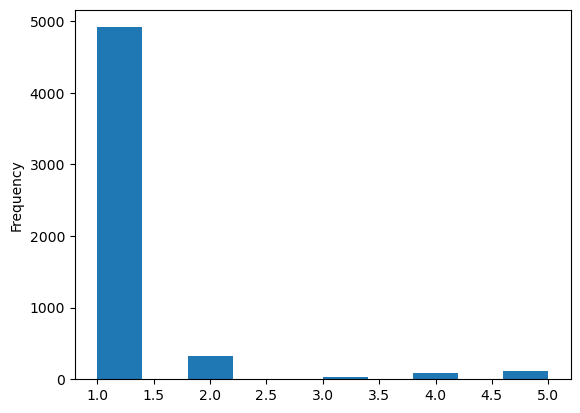

In [8]:
df['class'].plot(kind='hist') # highly imbalanced dataset

### Distribution of all attributes

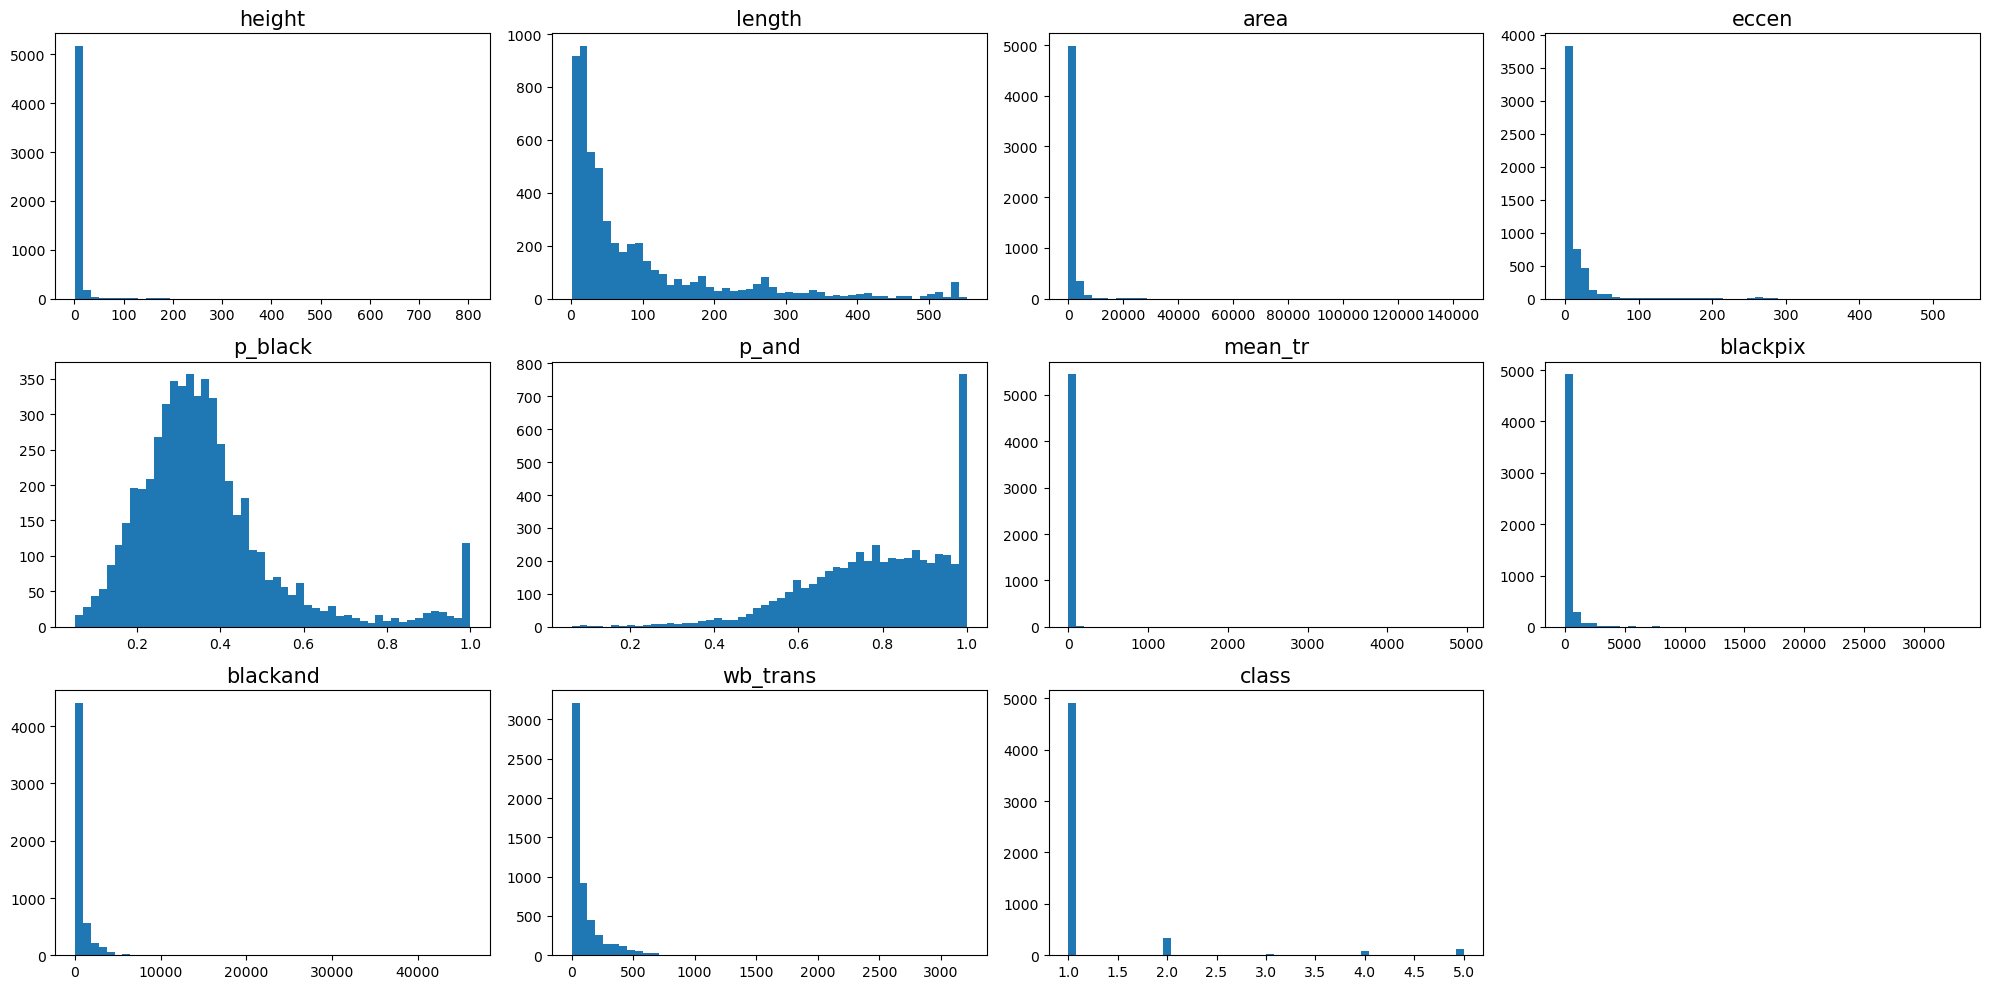

In [9]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.hist(df[col],bins=50)
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Relationship between other attributes with target attribute

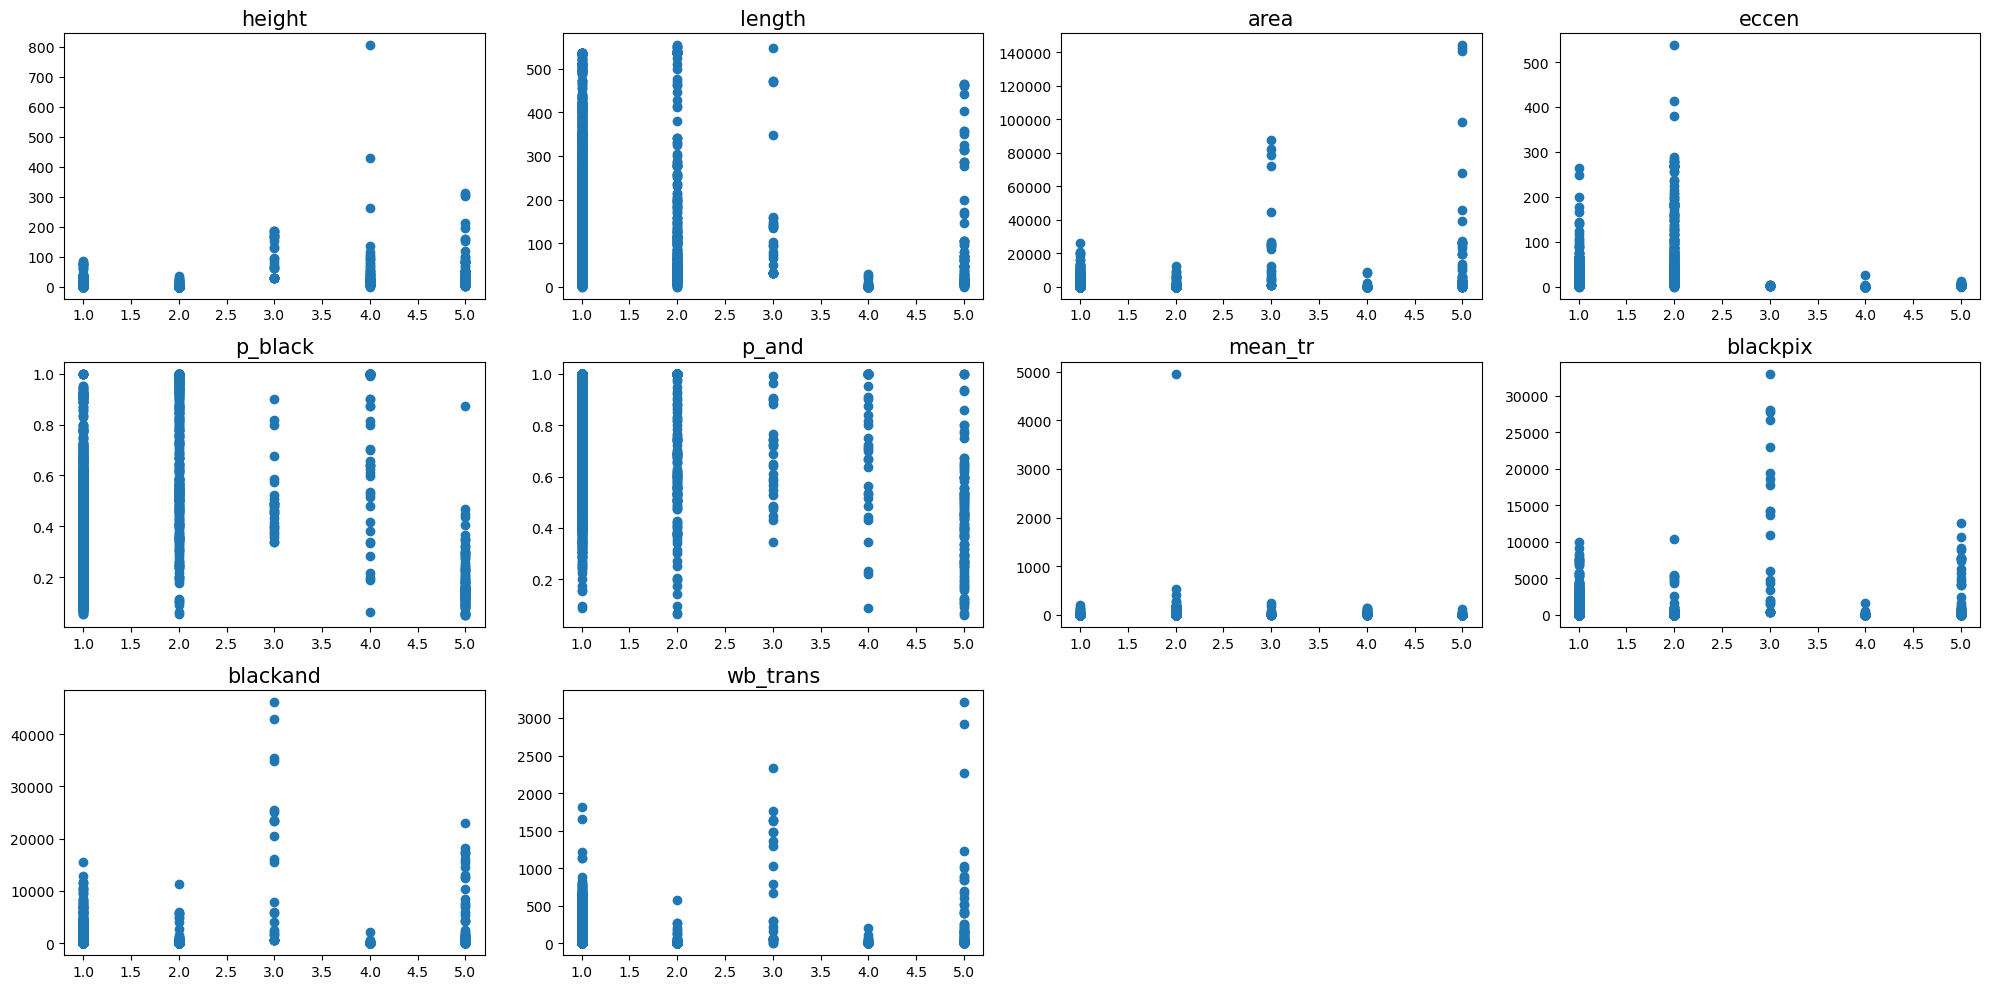

In [10]:
i=1
plt.figure(figsize=(20,10))

for col in df.drop(columns='class').columns:
    plt.subplot(3,4,i)
    plt.scatter(df['class'],df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Boxplot of all attributes ( Outlier Detection )

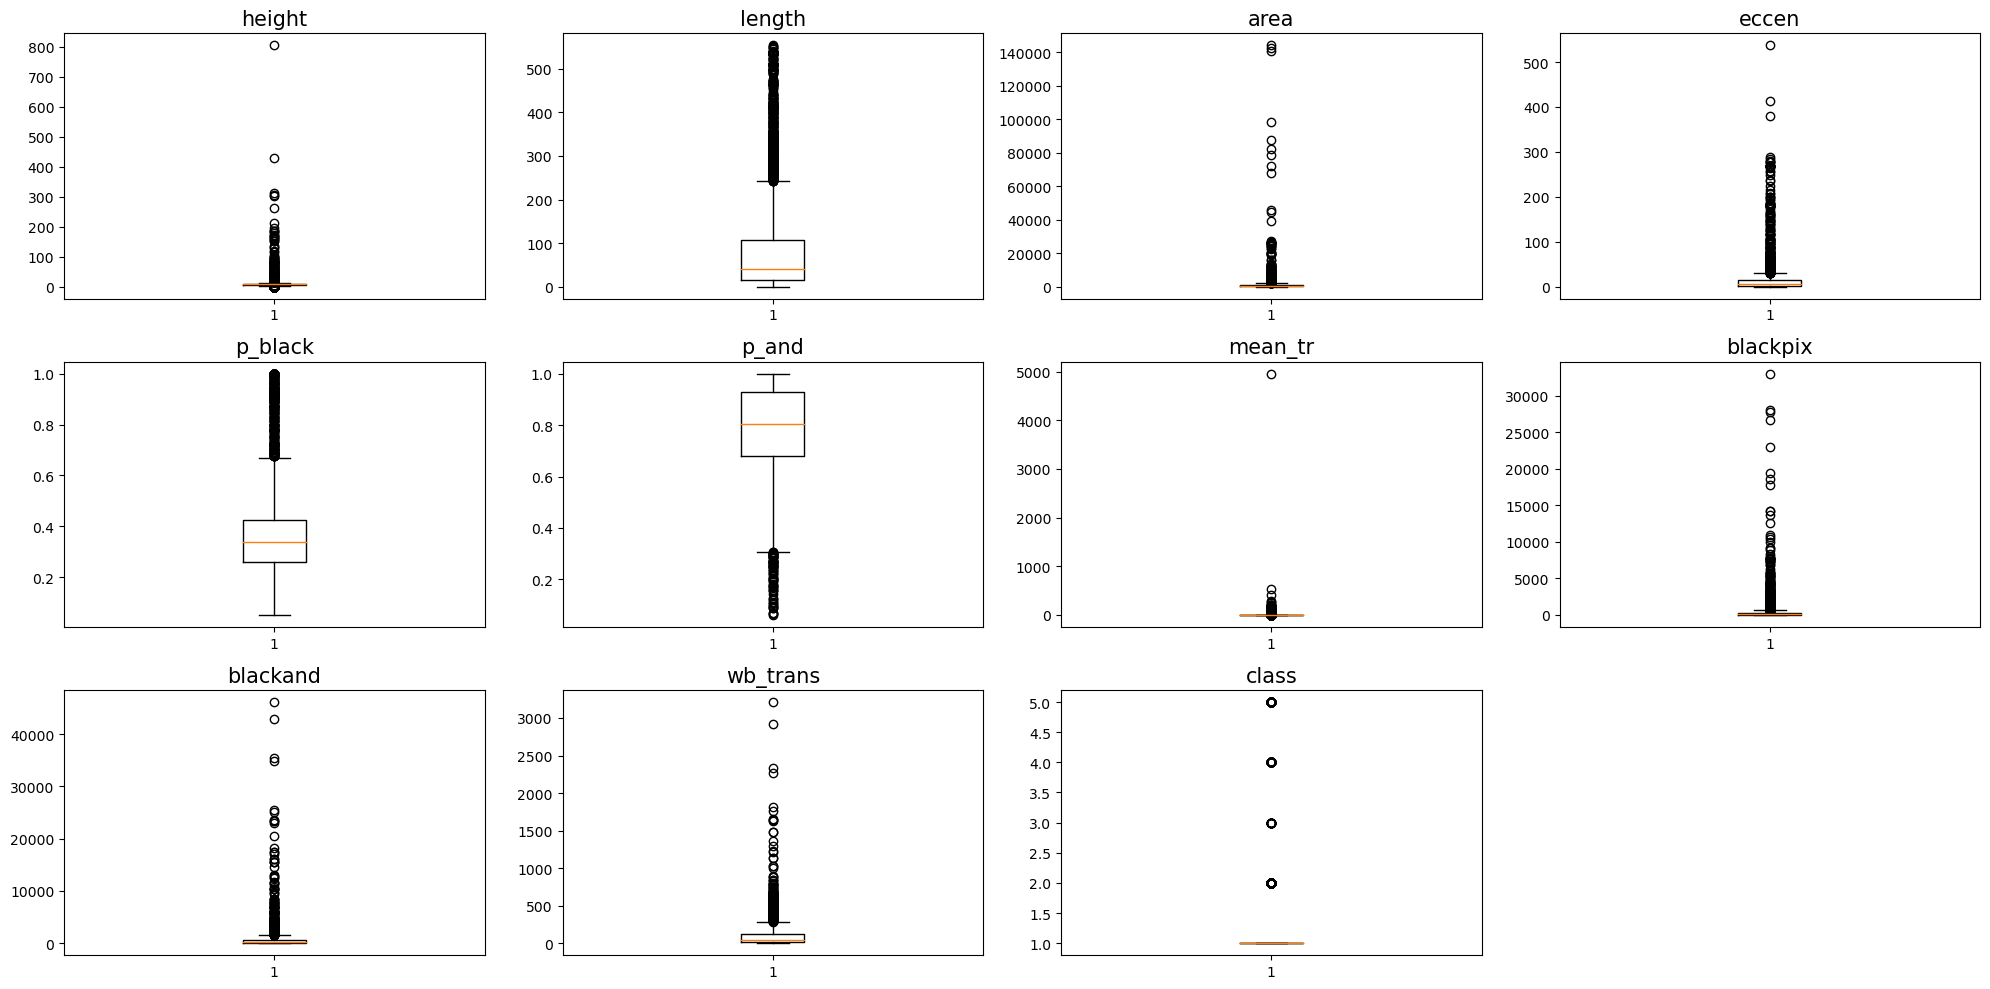

In [11]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Removing Outliers 

In [12]:
df = df[df['height']<250] 
df = df[df['area']<35000]
df = df[df['eccen']<300]
df = df[df['mean_tr']<4000]
df = df[df['blackand']<30000]
df = df[df['wb_trans']<2000]

### After Removing Outliers 

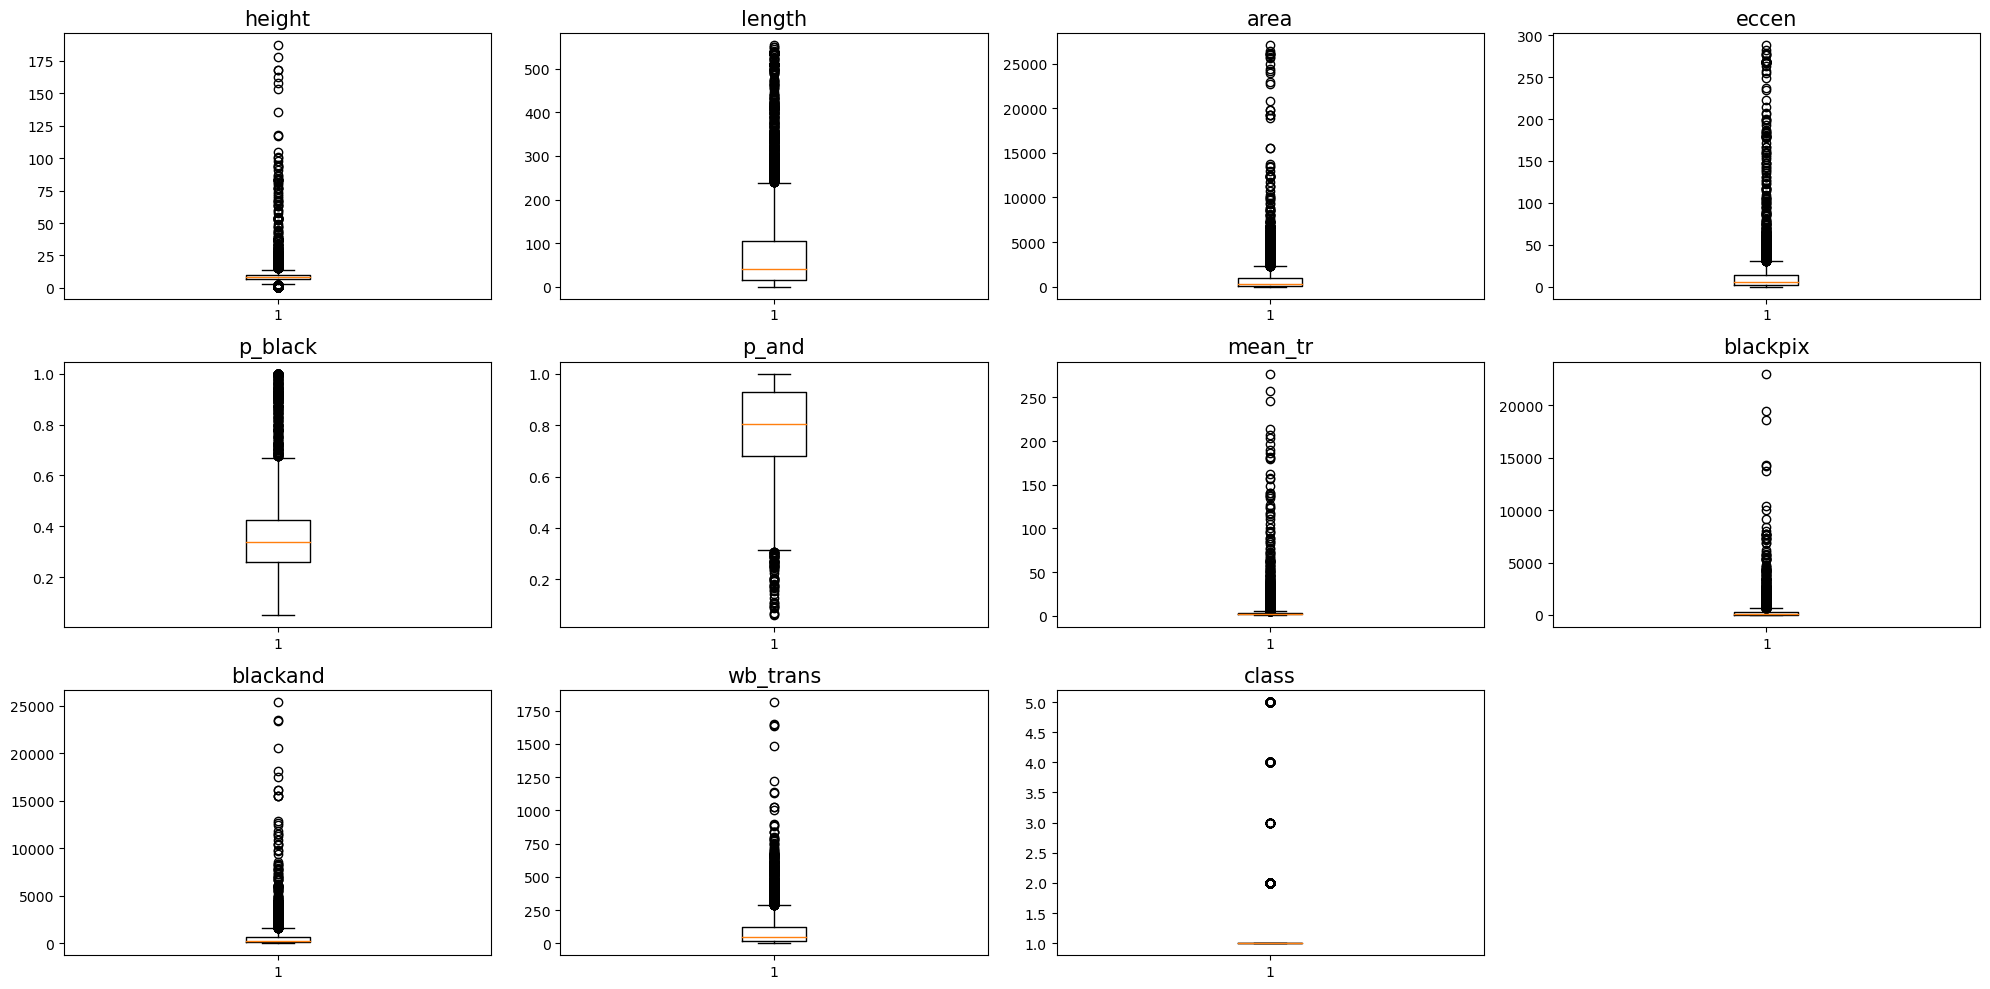

In [13]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

## 2. Explore data/数据探索

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


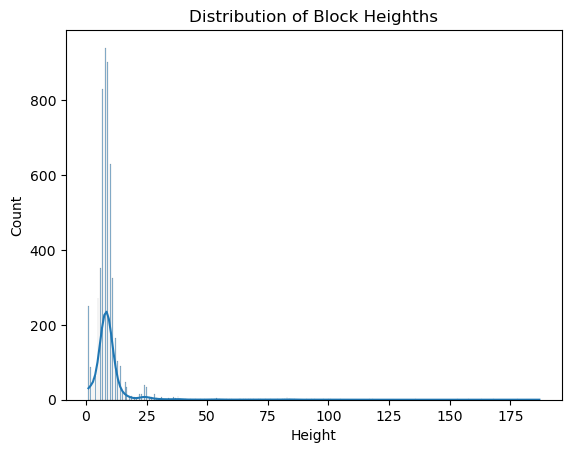

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Basic histogram, looking at the distribution of 'height'
sns.histplot(df['height'], kde=True)
plt.title('Distribution of Block Heighths')
plt.xlabel('Height')
plt.show()

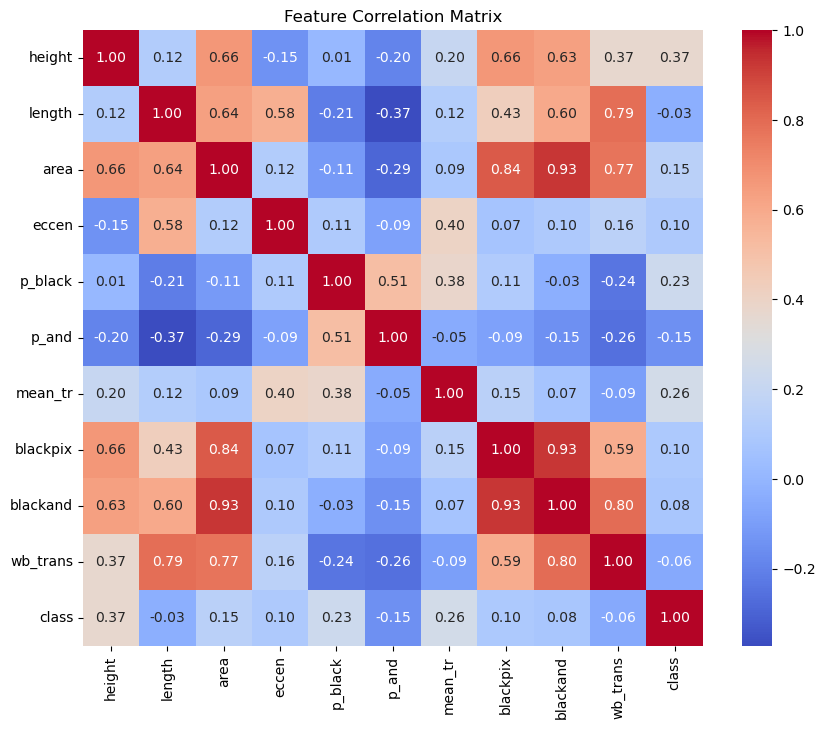

In [15]:
# Correlation matrix heatmap between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

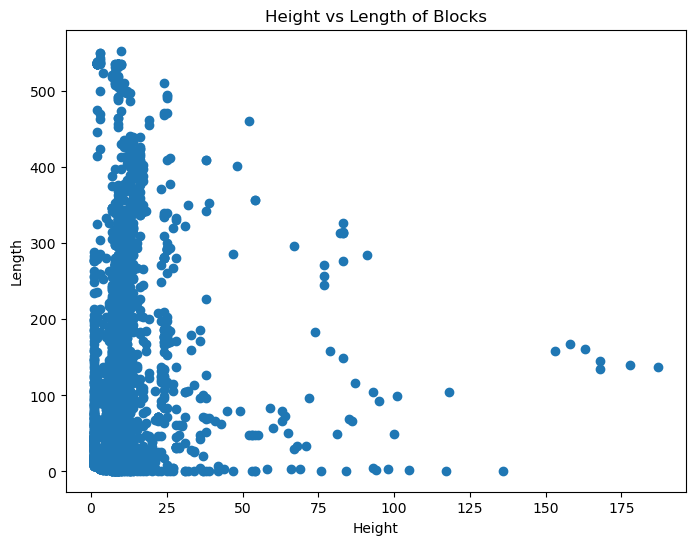

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 散点图：展示 'height' 和 'length' 之间的关系
plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['length'])
plt.title('Height vs Length of Blocks')
plt.xlabel('Height')
plt.ylabel('Length')
plt.show()

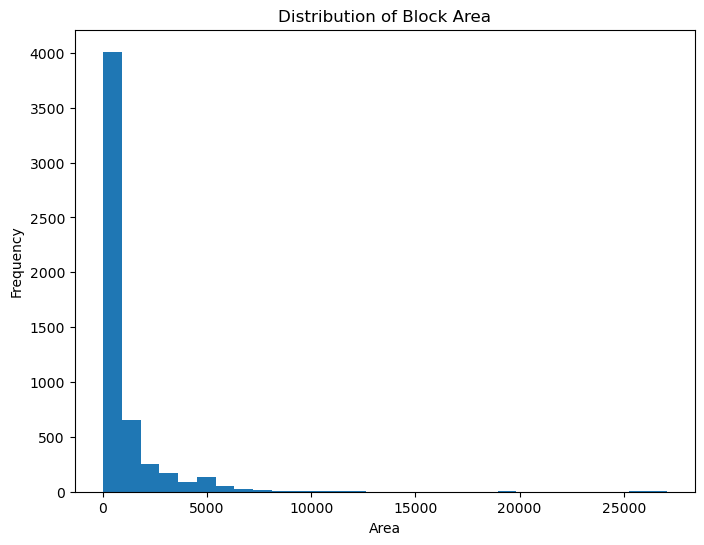

In [17]:
# 直方图：查看 'area' 的分布
plt.figure(figsize=(8, 6))
plt.hist(df['area'], bins=30)
plt.title('Distribution of Block Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


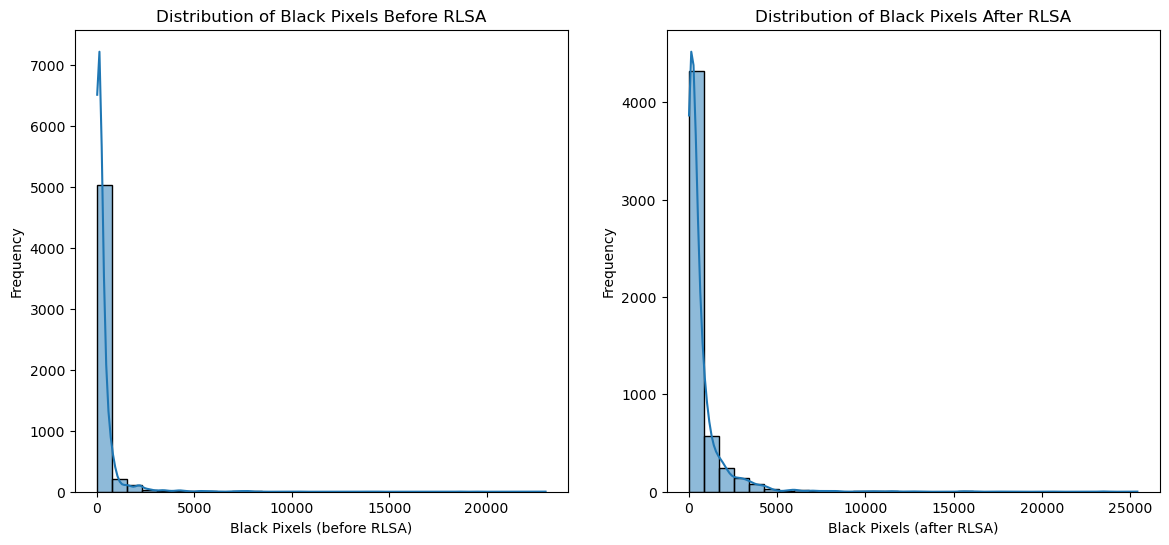

In [18]:
# 多数直方图：比较 'blackpix' 和 'blackand' 的分布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['blackpix'], bins=30, ax=axes[0], kde=True)
sns.histplot(df['blackand'], bins=30, ax=axes[1], kde=True)
axes[0].set_title('Distribution of Black Pixels Before RLSA')
axes[1].set_title('Distribution of Black Pixels After RLSA')
axes[0].set_xlabel('Black Pixels (before RLSA)')
axes[1].set_xlabel('Black Pixels (after RLSA)')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')
plt.show()

## 3. Data model analysis/数据模型分析

### Use logistic regression to build a baseline model/使用逻辑回归建立基线模型

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1]  # Feature
y = df.iloc[:, -1]   # target variable

# Feature scaling/特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset/分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model/创建逻辑回归模型
logreg = LogisticRegression()

# Training model
logreg.fit(X_train, y_train)

# Predict test set/预测测试集
y_pred = logreg.predict(X_test)

# Evaluate model performance/评估模型性能
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

[[969   6   0   1   1]
 [ 11  53   0   0   0]
 [  3   0   2   0   0]
 [  4   0   0  16   0]
 [ 14   0   0   0  11]]
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       977
           2       0.90      0.83      0.86        64
           3       1.00      0.40      0.57         5
           4       0.94      0.80      0.86        20
           5       0.92      0.44      0.59        25

    accuracy                           0.96      1091
   macro avg       0.94      0.69      0.77      1091
weighted avg       0.96      0.96      0.96      1091

Accuracy:0.9633363886342805


d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 随机森林

#### Predicting a single target (regression problem)/预测单一目标（回归问题）

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X = df.drop('height', axis=1)  
y = df['height']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier instance/创建随机森林分类器实例
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
rf_clf.fit(X_train, y_train)

# Use the model to make predictions/使用模型进行预测
y_pred = rf_clf.predict(X_test)

# Evaluate model performance/评估模型性能
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# 特征重要性/Feature importance
feature_importances = rf_clf.feature_importances_
feature_names = X.columns
importances = sorted(zip(feature_importances, feature_names), reverse=True)

print("Feature Importance:")
for importance, name in importances:
    print(f"{name}: {importance:.4f}")

Confusion Matrix:
 [[44  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  1  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       0.96      1.00      0.98        22
           3       0.43      0.60      0.50         5
           4       0.57      0.25      0.35        16
           5       0.81      0.88      0.84        66
           6       0.91      0.71      0.80        73
           7       0.84      0.91      0.87       161
           8       0.84      0.91      0.88       167
           9       0.88      0.91      0.89       202
          10       0.81      0.80      0.80       126
          11       0.66      0.69      0.67        58
          12       0.72      0.58      0.64        31
          13       0.58      0.52      0.55        21
          14       0.57      0.44      0.50

d:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Rec

#### Multi-objective regression problem/多目标回归问题

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设数据集为 df
X = df.drop(['height', 'length', 'area'], axis=1)  
y = df[['height', 'length', 'area']]  # 组合成多维目标向量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林多目标回归模型
from sklearn.multioutput import MultiOutputRegressor
rf_multioutput = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# 训练模型
rf_multioutput.fit(X_train, y_train)

# 预测
y_pred = rf_multioutput.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 46276.27958392911


## 4. Model evaluation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [23]:
from sklearn.utils import shuffle
df = shuffle(df)

In [24]:
X = df.drop(columns=['class'])
Y = df['class']

#### Normalization ( z-score )

In [25]:
X= (X-X.mean())/X.std()

### Gaussian NB

#### K-Fold :
 That method is known as “k-fold cross validation”. It’s easy to follow and implement. Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in dataset, build model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of k recorded errors is called the cross-validation error and will serve as performance metric for the model


In [26]:
GBN = GaussianNB()

In [27]:
scores = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

#### 5-Fold Cross-validation

In [28]:
score5 = cross_val_score(GBN,X,Y,cv=5,verbose=3)

[CV] END ................................ score: (test=0.820) total time=   0.0s
[CV] END ................................ score: (test=0.865) total time=   0.0s
[CV] END ................................ score: (test=0.787) total time=   0.0s
[CV] END ................................ score: (test=0.805) total time=   0.0s
[CV] END ................................ score: (test=0.792) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [29]:
print("MIN - " , score5.min())
print("AVG - " , score5.mean())
print("MAX - " , score5.max())

MIN -  0.7873510540788268
AVG -  0.813858172369428
MAX -  0.8652612282309807


#### 10-Fold Cross-validation

In [30]:
score10 = cross_val_score(GBN,X,Y,cv=10,verbose=3)

[CV] END ................................ score: (test=0.822) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s
[CV] END ................................ score: (test=0.885) total time=   0.0s
[CV] END ................................ score: (test=0.782) total time=   0.0s
[CV] END ................................ score: (test=0.791) total time=   0.0s
[CV] END ................................ score: (test=0.791) total time=   0.0s
[CV] END ................................ score: (test=0.793) total time=   0.0s
[CV] END ................................ score: (test=0.818) total time=   0.0s
[CV] END ................................ score: (test=0.782) total time=   0.0s
[CV] END ................................ score: (test=0.822) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [31]:
print("MIN - " , score10.min())
print("AVG - " , score10.mean())
print("MAX - " , score10.max())

MIN -  0.781651376146789
AVG -  0.8087139160533656
MAX -  0.8846153846153846


### Calculate the cross validation score on different split point in k-fold


In [32]:
for i in range(1,20):
    score = cross_val_score(GBN,X,Y,cv=i+1)
    scores.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5, 1.0, 'Accuracy Vs N_Split')

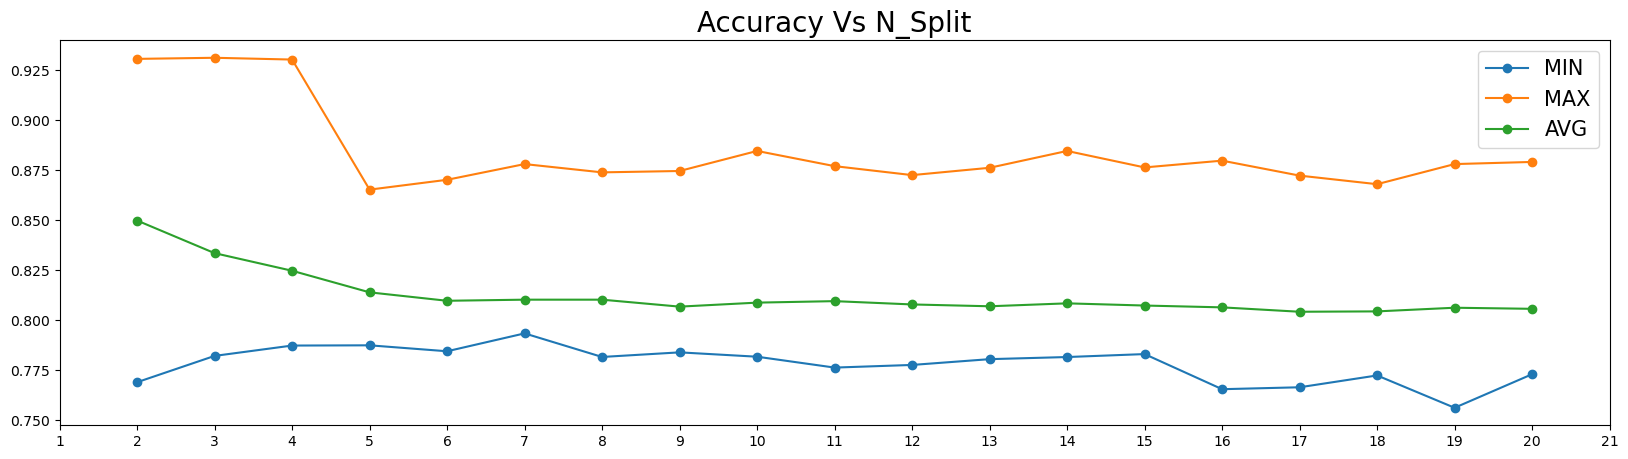

In [33]:
plt.figure(figsize=(20,5))

plt.plot(scores['MIN'],marker='o')
plt.plot(scores['MAX'],marker='o')
plt.plot(scores['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)

#### Stratified K-Fold
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.<br>
It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance. 

In [34]:
scores2 = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

In [35]:
#calculate the cross validation score on different split point in stratified k-fold and store into dataframe
for i in range(1,20):
    cv = StratifiedKFold(n_splits=i+1,shuffle=True)
    score = cross_val_score(GBN,X,Y,cv=cv)               #Crossvalidation
    scores2.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5, 1.0, 'Accuracy Vs N_Split')

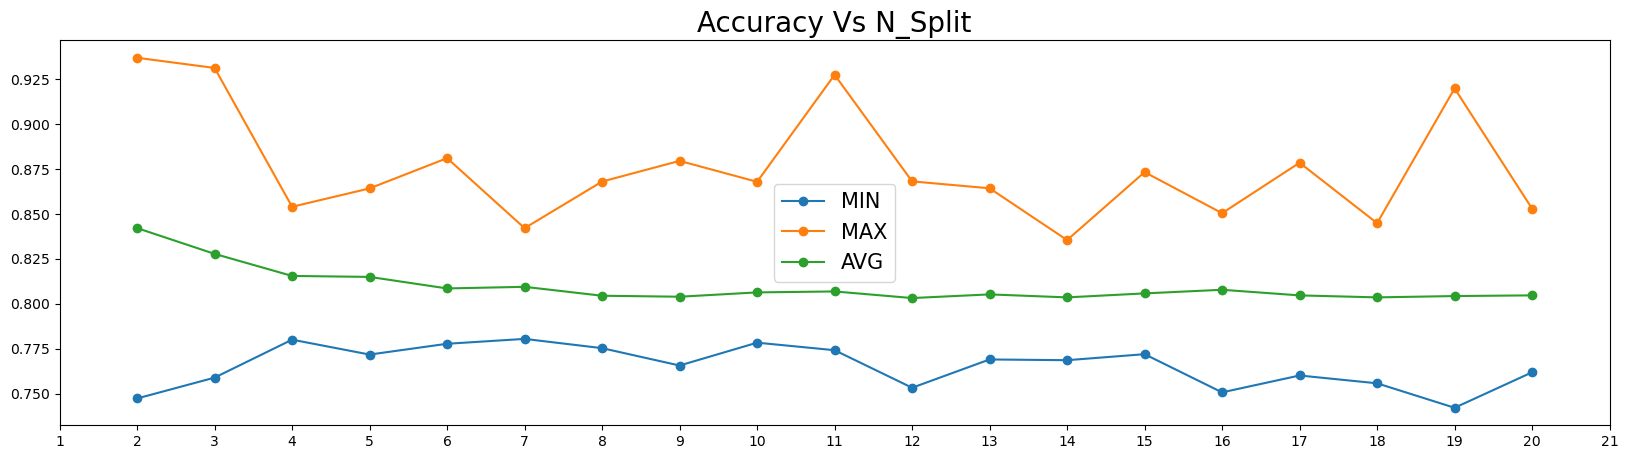

In [36]:
plt.figure(figsize=(20,5))

plt.plot(scores2['MIN'],marker='o')
plt.plot(scores2['MAX'],marker='o')
plt.plot(scores2['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)